## Modeling Notebook — Deep Learning Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_pickle('df_res.pkl')
df_test = pd.read_pickle('df_test.pkl')

In [3]:
print(df.shape)
df.head()


(4282, 23)


,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,eve_perc,total_calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,churn
0,-2.248868,-0.599061,0.681956,0.822446,-1.643724,1.326353,0.381199,0.506571,-0.154375,-0.212111,...,-1.777989,1.514352,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
1,1.087537,-0.599061,-0.849396,0.030807,1.063657,1.377664,0.551703,-1.629834,0.493396,-1.017069,...,0.882205,-0.207048,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,-1.136733,1.146519,-1.062390,-0.661877,-0.328988,-1.239212,1.305091,-0.103830,0.889256,-0.614590,...,-0.341548,-1.199041,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
3,-1.364215,2.092042,-1.225808,2.455201,0.837718,-0.161675,-0.437614,0.608305,1.069192,0.592847,...,1.394637,1.747762,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,0.531469,2.092042,-0.304059,0.327672,2.179722,0.915862,-0.015321,-0.765099,0.493396,0.190368,...,1.534297,0.288949,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [4]:
df.columns.values

array(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes', 'churn'], dtype=object)

In [5]:
X_train = df[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes']]
y_train = df['churn']

X_test = df_test[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes']]
y_test = df_test['churn']

In [6]:
X_test.shape

(210, 22)

In [65]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [66]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),verbose = 0)
print('500 epochs are done.')

<AxesSubplot:>

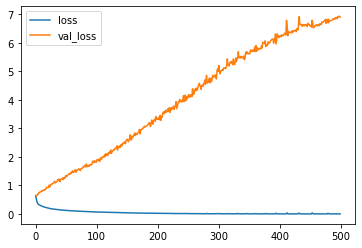

In [67]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [68]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

In [71]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
143/143 [==============================] - 0s 785us/step - loss: 0.6736 - val_loss: 0.6629
Epoch 2/500
143/143 [==============================] - 0s 433us/step - loss: 0.4788 - val_loss: 0.6688
Epoch 3/500
143/143 [==============================] - 0s 412us/step - loss: 0.3909 - val_loss: 0.6970
Epoch 4/500
143/143 [==============================] - 0s 404us/step - loss: 0.3428 - val_loss: 0.7197
Epoch 5/500
143/143 [==============================] - 0s 407us/step - loss: 0.3421 - val_loss: 0.7434
Epoch 6/500
143/143 [==============================] - 0s 400us/step - loss: 0.3182 - val_loss: 0.7091
Epoch 00006: early stopping


<AxesSubplot:>

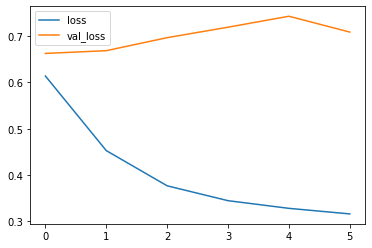

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [11]:
from tensorflow.keras.layers import Dropout

In [74]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(11,activation = 'relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [75]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
143/143 [==============================] - 0s 776us/step - loss: 0.7555 - val_loss: 0.7084
Epoch 2/500
143/143 [==============================] - 0s 446us/step - loss: 0.6617 - val_loss: 0.7033
Epoch 3/500
143/143 [==============================] - 0s 429us/step - loss: 0.6424 - val_loss: 0.6711
Epoch 4/500
143/143 [==============================] - 0s 429us/step - loss: 0.6118 - val_loss: 0.6511
Epoch 5/500
143/143 [==============================] - 0s 425us/step - loss: 0.5970 - val_loss: 0.6203
Epoch 6/500
143/143 [==============================] - 0s 422us/step - loss: 0.5699 - val_loss: 0.6404
Epoch 7/500
143/143 [==============================] - 0s 424us/step - loss: 0.5664 - val_loss: 0.6138
Epoch 8/500
143/143 [==============================] - 0s 420us/step - loss: 0.5483 - val_loss: 0.6137
Epoch 9/500
143/143 [==============================] - 0s 422us/step - loss: 0.5458 - val_loss: 0.6172
Epoch 10/500
143/143 [==============================] - 0s 427us/step - l

<AxesSubplot:>

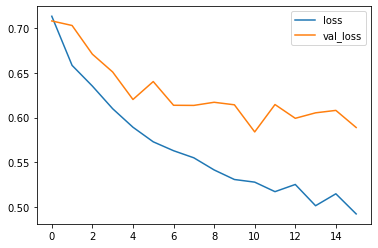

In [76]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [15]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(11,activation = 'relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [16]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
134/134 [==============================] - 0s 1ms/step - loss: 0.7062 - val_loss: 0.6695
Epoch 2/500
134/134 [==============================] - 0s 465us/step - loss: 0.6270 - val_loss: 0.7110
Epoch 3/500
134/134 [==============================] - 0s 456us/step - loss: 0.5806 - val_loss: 0.7137
Epoch 4/500
134/134 [==============================] - 0s 451us/step - loss: 0.5842 - val_loss: 0.7056
Epoch 5/500
134/134 [==============================] - 0s 454us/step - loss: 0.5643 - val_loss: 0.7202
Epoch 6/500
134/134 [==============================] - 0s 449us/step - loss: 0.5534 - val_loss: 0.6966
Epoch 00006: early stopping


<AxesSubplot:>

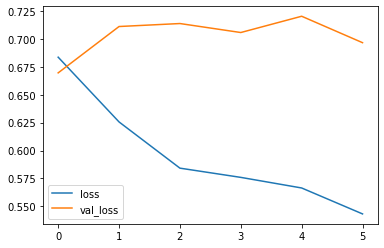

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [80]:
y_pred = model.predict_classes(X_test)

/Users/paultorres/miniforge3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       114
           1       0.18      0.24      0.21        17

    accuracy                           0.76       131
   macro avg       0.53      0.54      0.53       131
weighted avg       0.79      0.76      0.78       131



In [83]:
print(confusion_matrix(y_test,y_pred))

[[96 18]
 [13  4]]
